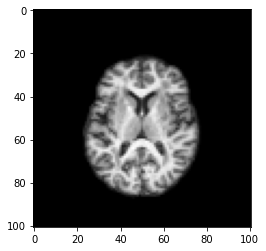

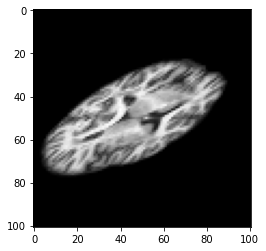

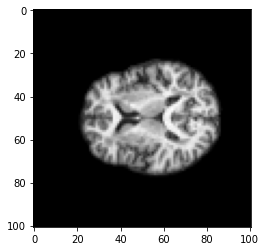

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt 

from collections import Counter

def nn_interpolate(A, new_size):
    """
    Nearest Neighbor Interpolation, Step by Step
    """
    # get sizes
    old_size = A.shape
    
    # calculate row and column ratios
    row_ratio, col_ratio = new_size[0]/old_size[0], new_size[1]/old_size[1]
    
    # define new pixel row position i
    new_row_positions = np.array(range(new_size[0]))+1
    new_col_positions = np.array(range(new_size[1]))+1
    
    # normalize new row and col positions by ratios
    new_row_positions = new_row_positions / row_ratio
    new_col_positions = new_col_positions / col_ratio
    
    # apply ceil to normalized new row and col positions
    new_row_positions = np.ceil(new_row_positions)
    new_col_positions = np.ceil(new_col_positions)
    
    # find how many times to repeat each element
    row_repeats = np.array(list(Counter(new_row_positions).values()))
    col_repeats = np.array(list(Counter(new_col_positions).values()))
    
    # perform column-wise interpolation on the columns of the matrix
    row_matrix = np.dstack([np.repeat(A[:, i], row_repeats) 
                            for i in range(old_size[1])])[0]
    
    # perform column-wise interpolation on the columns of the matrix
    nrow, ncol = row_matrix.shape
    final_matrix = np.stack([np.repeat(row_matrix[i, :], col_repeats)
                             for i in range(nrow)])

    return final_matrix

def main(a1,a2,a3,a4,a5,a6):

    from PIL import Image

    image = np.array(Image.open('brain0030slice150_101x101.png')) # opening image as an array

    h, w = image.shape # keeping the width and the height of the png

    height = float(h)
    height = round(height)
    half_height = round(height/2)

    width = float(w)
    width = round(width)
    half_width = round(width/2)

    newImage = np.zeros((height,width)) # creating the array tha will hold the points of the new Image
 
    areaOfImage = width * height # calculating the area of the image

    center = round((half_height+half_width)/2) # saving the center of the image

    #print(center)

    a1 = float(a1)
    a2 = float(a2)
    a3 = float(a3)
    a4 = float(a4)
    a5 = float(a5)
    a6 = float(a6)

    tAffine = np.array([[a1,a2,a3], [a4,a5,a6], [0,0,1]], np.int32) # initializing Taffine array

    #print(tAffine)

    oldPoints = [[1 for i in range(areaOfImage)] for j in range(3)] # new array 3 x areaOfImage of one's

    counter = 0
    
    for i in range(0,width):
        if (i != 0):
            counter+=height
        for j in range(0,height):
            oldPoints[0][j+counter] = j - center # saving the x's of the image (height)
            oldPoints[1][j+counter] = i - center # saving the y's of the image (width)

    #print(oldPoints)
  
    newPoints = tAffine @ oldPoints  # mult. Taffine with the newArray to take the new points

    #print(newPoints)

    for i in range(0,areaOfImage):  # updating the new Image with the new points
        new_axisX = newPoints[0][i]+center
        new_axisY = newPoints[1][i]+center
        old_axisX = oldPoints[0][i]+center
        old_axisY = oldPoints[1][i]+center
    
        if(width>new_axisX>0 and height>new_axisY>0 and width>old_axisX>0 and height>old_axisY>0): # check if the new image protrudes the boundaries of the old image
            newImage[old_axisY][old_axisX] = image[new_axisY][new_axisX]
        

    final_image = nn_interpolate( newImage, (height,width) ) # image after using the Nearest Neighbor Interpolation

    return(final_image)

    #Image.fromarray(np.uint8(newImage)).save(sys.argv[2]) # saving the image to disk

image = main(0, -1, 0, 1, 0, 0) # 90 degree counter clockwise rotation
plt.imshow(image, cmap="gray") # Showing the image
plt.show()

image = main(1, 1, 0, 0, 1, 0) # distortion in the X axis
plt.imshow(image, cmap="gray") # Showing the image
plt.show()

image = main(-1, 0, 0 , 0, 1, 0) # mirroring the image
plt.imshow(image, cmap="gray") # Showing the image
plt.show()

    